# MFN vs TFN on ranking-based comparison with only 'useful' alter and at least 2 meetups

In [30]:
import numpy as np
import pandas as pd
import meetup_strategy as ms
import time 
import pickle
import util
import seaborn as sns
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [357]:
import visualization as vs
from functools import reduce
import matplotlib.pyplot as plt
import pickle

# Global variables

In [456]:
placeid_path = "temp_data/wp-150/weeplace_placeidT_150.pickle"
MFN_H_path = "final/wp-150/wp-H-MFN.csv"
MFN_D_path = "final/wp-150/wp-D-MFN.csv"
MFN_24H_path = "final/wp-150/wp-24H-MFN.csv"
MFN_whole_path = "final/wp-150/wps10only-whole-MFN.csv"
MFN_TFN_path = "final/wp-150/wp-TFN.csv"

In [398]:
def transform_df(MFN_H_path):
    df_H_MFN = pd.read_csv(MFN_H_path)
    df_H_MFN = df_H_MFN[['Included Rank','userid_y', 'CCE_alters', 'CCE_ego_alters', 'Pi_alters', 'Pi_ego_alters', 
                                     'LZ_entropy', 'Pi', 'n_meetupers_x', 'n_meetupers_y', 'userid_x']]
    df_H_MFN = df_H_MFN.rename({'Included Rank': 'Included', 
                                'userid_x': 'userid',
                                'Pi': 'Pi_ego'}, axis=1)

    df_H_MFN['Pi_alters_ratio'] = df_H_MFN['Pi_alters'] / df_H_MFN['Pi_ego'] 
    df_H_MFN['Pi_ego_alters_ratio'] = df_H_MFN['Pi_ego_alters'] / df_H_MFN['Pi_ego'] 
    return df_H_MFN

## H-MFN details

In [399]:
df_H_MFN = transform_df(MFN_H_path)

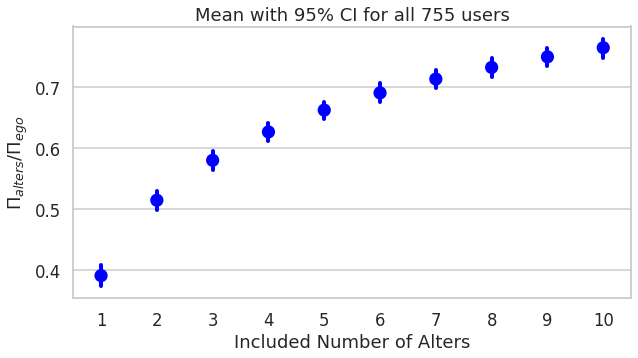

In [400]:
vs.cv_plot(df_H_MFN[df_H_MFN['n_meetupers_x'] >=10], threshold=10, 
           plot_type='errorbar', mode='talk', l=10, w=5)

## 24H-MFN details

In [401]:
df_24H_MFN = transform_df(MFN_24H_path)

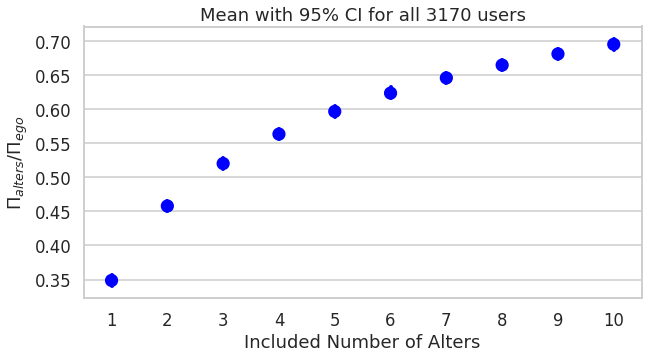

In [402]:
vs.cv_plot(df_24H_MFN[df_24H_MFN['n_meetupers_x'] >=10], threshold=10, 
           plot_type='errorbar', mode='talk', l=10, w=5)

## D-MFN details

In [403]:
df_D_MFN = transform_df(MFN_D_path)

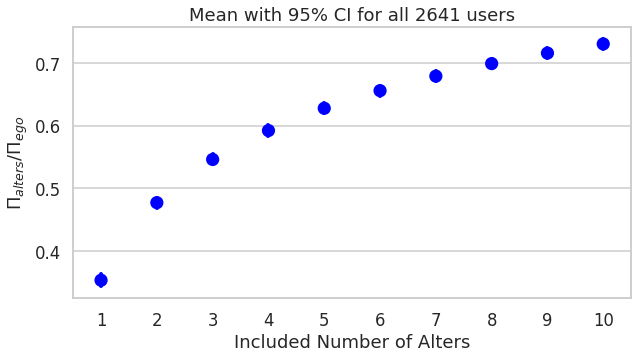

In [404]:
vs.cv_plot(df_D_MFN[df_D_MFN['n_meetupers_x'] >=10], threshold=10, 
           plot_type='errorbar', mode='talk', l=10, w=5)

## TFN details

In [405]:
df_TFN = transform_df(MFN_TFN_path)

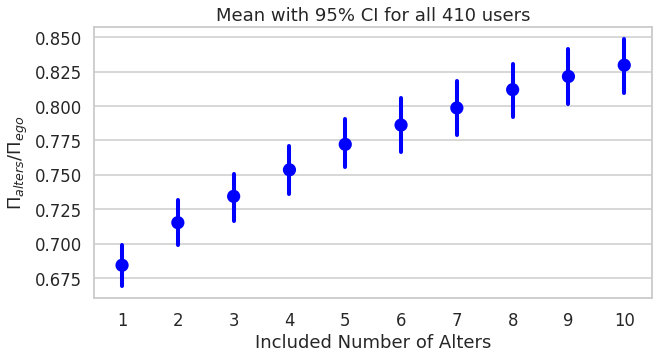

In [406]:
vs.cv_plot(df_TFN[df_TFN['n_meetupers_x'] >=10], threshold=10, 
           plot_type='errorbar', mode='talk', l=10, w=5)

## Compare MFNs and TFN, different egos in these networks

In [467]:
df_H_MFN['category'] = 'CB-1H-MFN'
df_D_MFN['category'] = 'CB-1D-MFN'
df_24H_MFN['category'] = 'SW-24H-MFN'
df_TFN['category'] = 'TFN'

In [468]:
all_networks = pd.concat([df_H_MFN, df_24H_MFN, df_D_MFN, df_TFN])

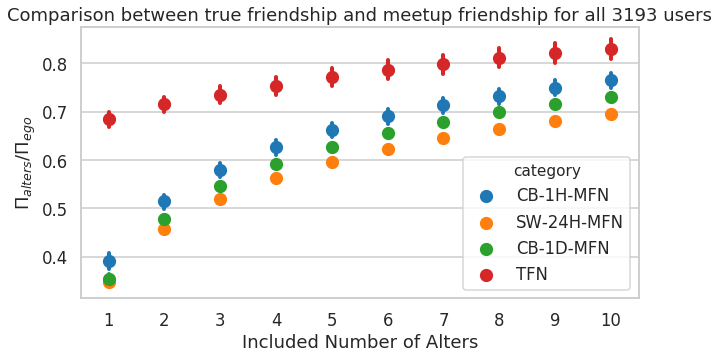

In [469]:
vs.cv_compare_plot(all_networks[all_networks['n_meetupers_x'] >=10], threshold=10, 
                   mode='talk', l=10, w=5)

## Compare MFNs and TFN, shared egos in both networks

In [479]:
df_all_MFN = transform_df(MFN_whole_path)
df_all_MFN['category'] = 'WT-MFN'

In [480]:
share_users_total = list(set(df_24H_MFN['userid'].tolist()) & 
                   set(df_H_MFN['userid'].tolist()) & 
                   set(df_D_MFN['userid'].tolist()) &
                   set(df_TFN['userid'].tolist()))
len(share_users_total)

710

In [481]:
share_users = list(set(df_24H_MFN[df_24H_MFN['n_meetupers_x'] >=10]['userid'].tolist()) & 
                   set(df_H_MFN[df_H_MFN['n_meetupers_x']>=10]['userid'].tolist()) & 
                   set(df_D_MFN[df_D_MFN['n_meetupers_x']>=10]['userid'].tolist()) &
                   set(df_TFN[df_TFN['n_meetupers_x']>=10]['userid'].tolist()) 
                  )
len(share_users)

289

In [384]:
# with open('temp_data/wp-150/wp-150-whole/wp_top10_ego.txt', 'a+') as outfile:
#     for i in range(len(share_users)):
#         outfile.write(str(share_users[i]) + '\n')

In [482]:
share_network = pd.concat([df_24H_MFN[df_24H_MFN['userid'].isin(share_users)], 
                           df_H_MFN[df_H_MFN['userid'].isin(share_users)],
                           df_D_MFN[df_D_MFN['userid'].isin(share_users)],
                           df_TFN[df_TFN['userid'].isin(share_users)],
                           df_all_MFN
                          ])

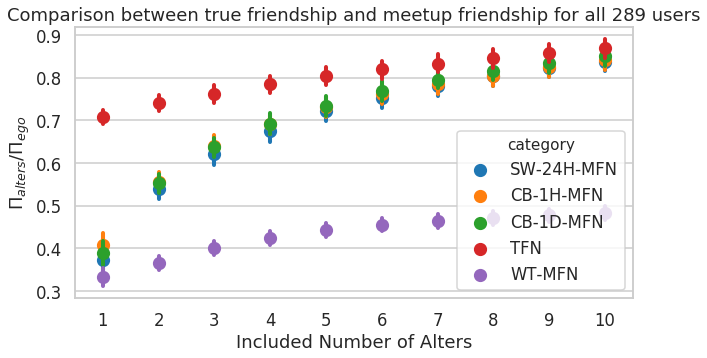

In [483]:
# vs.cv_compare_plot(share_network[share_network['n_meetupers_x'] >=10], threshold=10, mode='talk', l=10, w=5)
vs.cv_compare_plot(share_network, threshold=10, mode='talk', l=10, w=5)

In [484]:
share_network.to_csv('final/wp-150/wp_shared_all.csv', index=False)

# Check these friendship networks (Basic)

In [418]:
print(len(df_24H_MFN), len(df_D_MFN), len(df_H_MFN), len(df_TFN))

283222 216086 25429 21022


In [419]:
print(df_24H_MFN['userid'].nunique(), df_D_MFN['userid'].nunique(), df_H_MFN['userid'].nunique(), df_TFN['userid'].nunique())

7383 7212 755 5557


In [420]:
n_meetupers_24H = df_24H_MFN.groupby('userid')['userid_y'].count().reset_index(name = 'count')
n_meetupers_24H['category'] = '24H-MFN'

n_meetupers_D = df_D_MFN.groupby('userid')['userid_y'].count().reset_index(name = 'count')
n_meetupers_D['category'] = 'D-MFN'

n_meetupers_H = df_H_MFN.groupby('userid')['userid_y'].count().reset_index(name = 'count')
n_meetupers_H['category'] = 'H-MFN'

n_meetupers_TFN = df_TFN.groupby('userid')['userid_y'].count().reset_index(name = 'count')
n_meetupers_TFN['category'] = 'TFN'

In [421]:
n_meetupers_ego = pd.concat([n_meetupers_24H, n_meetupers_D, n_meetupers_H, n_meetupers_TFN
                            ]
                           )

Text(0.5, 1.0, 'The average number of alters for each ego (all users)')

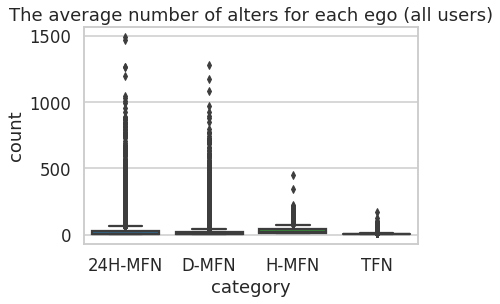

In [422]:
sns.boxplot(data=n_meetupers_ego, x='category', y = 'count').set_title("The average number of alters for each ego (all users)")

In [423]:
print(df_24H_MFN.groupby('userid')['userid_y'].count().sum()/df_24H_MFN['userid'].nunique(),
      df_D_MFN.groupby('userid')['userid_y'].count().sum()/df_D_MFN['userid'].nunique(),
      df_H_MFN.groupby('userid')['userid_y'].count().sum()/df_H_MFN['userid'].nunique(),
      df_TFN.groupby('userid')['userid_y'].count().sum()/df_TFN['userid'].nunique(),
)

38.361370716510905 29.962007764836383 33.680794701986756 3.7829764261292063


# Check these friendship networks on shared users (total)

In [427]:
len(share_users_total)

710

In [428]:
share_network_total = pd.concat([df_24H_MFN[df_24H_MFN['userid'].isin(share_users_total)], 
                           df_H_MFN[df_H_MFN['userid'].isin(share_users_total)],
                           df_D_MFN[df_D_MFN['userid'].isin(share_users_total)],
                           df_TFN[df_TFN['userid'].isin(share_users_total)]
                          ])

In [429]:
share_network_total.groupby('category').size()

category
24H-MFN    168303
D-MFN      136401
H-MFN       24509
TFN          8224
dtype: int64

In [430]:
n_meetuper_total_shared_ego = share_network_total.groupby(['category', 'userid'])['Included'].count().reset_index(name='count')

Text(0.5, 1.0, 'The average number of alters for each ego (all shared users)')

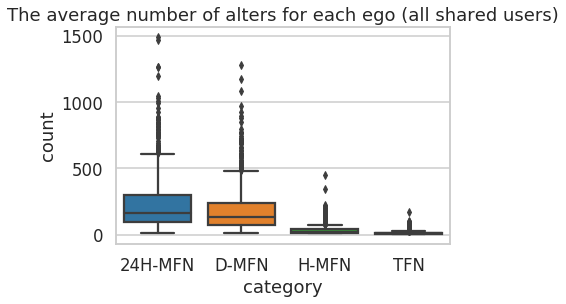

In [431]:
sns.boxplot(data=n_meetuper_total_shared_ego, x='category', 
            y = 'count').set_title("The average number of alters for each ego (all shared users)")

In [432]:
n_meetuper_total_shared_ego.groupby('category')['count'].sum()/len(share_users_total)

category
24H-MFN    237.046479
D-MFN      192.114085
H-MFN       34.519718
TFN         11.583099
Name: count, dtype: float64

# Check these friendship networks on shared users (>=10 meetupers)

In [433]:
len(share_users)

289

In [434]:
share_network.groupby('category').size()

category
24H-MFN    85480
All-MFN     3179
D-MFN      70498
H-MFN      13549
TFN         6346
dtype: int64

In [440]:
n_meetuper_shared_ego = share_network[share_network['category'] != 'All-MFN'
                                     ].groupby(['category', 'userid'])['Included'].count().reset_index(name='count')

Text(0.5, 1.0, 'The average number of alters for each ego \n (Shared users with >= 10 meetupers)')

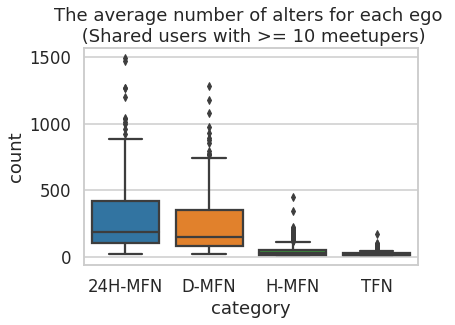

In [441]:
sns.boxplot(data=n_meetuper_shared_ego, x='category', 
            y = 'count').set_title("The average number of alters for each ego \n (Shared users with >= 10 meetupers)")

In [442]:
n_meetuper_shared_ego.groupby('category')['count'].sum()/len(share_users)

category
24H-MFN    295.778547
D-MFN      243.937716
H-MFN       46.882353
TFN         21.958478
Name: count, dtype: float64

# Check these friendship network only on top-10 friends

In [443]:
VIP_network = share_network[share_network['Included'] <=10]

In [466]:
VIP_network.to_csv('final/wp-150/wp_VIP.csv', index=False)

In [445]:
VIP_network_24H_MFN = VIP_network[VIP_network['category'] == '24H-MFN'][['Included','userid', 'userid_y']]
VIP_network_D_MFN = VIP_network[VIP_network['category'] == 'D-MFN'][['Included', 'userid', 'userid_y']]
VIP_network_H_MFN = VIP_network[VIP_network['category'] == 'H-MFN'][['Included', 'userid', 'userid_y']]
VIP_network_TFN = VIP_network[VIP_network['category'] == 'TFN'][['Included', 'userid', 'userid_y']]
VIP_network_All_MFN = VIP_network[VIP_network['category'] == 'All-MFN'][['Included','userid', 'userid_y']]

In [529]:
VIP_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Included','userid'],
                                                how='left'), [VIP_network_All_MFN,
                                                              VIP_network_24H_MFN, 
                                                              VIP_network_D_MFN,
                                                              VIP_network_H_MFN,
                                                              VIP_network_TFN])
# VIP_merged.columns = ['Included', 'userid', 'All-MFN' ,'24H-MFN', 'D-MFN', 'H-MFN', 'TFN']
VIP_merged.columns = ['Included', 'userid', 'WT-MFN','SW-24H-MFN', 'CB-1D-MFN', 'CB-1H-MFN', 'TFN']

### Gobal Jaccard similarity for all alters in these networks

In [485]:
VIP_similarity = util.jaccard_pandas_similarity(VIP_merged[VIP_merged.columns[-5:]])
VIP_similarity = pd.DataFrame(VIP_similarity, columns=['WT-MFN','SW-24H-MFN', 'CB-1D-MFN', 'CB-1H-MFN', 'TFN'])
VIP_similarity.index = ['WT-MFN','SW-24H-MFN', 'CB-1D-MFN', 'CB-1H-MFN', 'TFN']

In [525]:
pickle_out = open("final/wp-150/wp_VIP_similarity.pickle", "wb")
pickle.dump(VIP_similarity, pickle_out)
pickle_out.close()

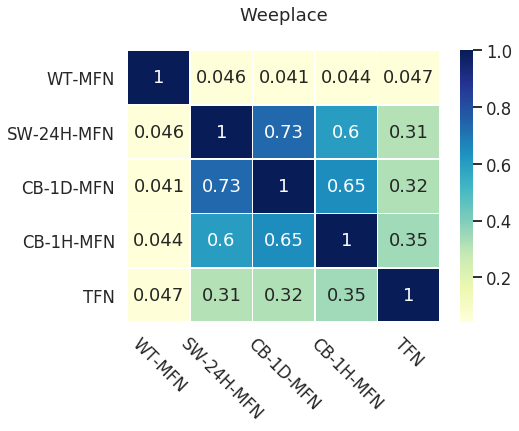

In [502]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(VIP_similarity , cmap="YlGnBu", ax=ax,
            linewidths=.5, annot=True)
# ax.xaxis.tick_top() # x axis on top
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=-45)
ax.set_title('Weeplace', pad=30)
plt.show()

### Focus on each egos in these networks

In [530]:
individual_similarity = {user: util.jaccard_pandas_similarity(VIP_merged[VIP_merged['userid'] == user]
                                                              [['WT-MFN','SW-24H-MFN', 'CB-1D-MFN', 
                                                                'CB-1H-MFN', 'TFN']]) for user in share_users}

In [451]:
# df_individual_similarity = pd.DataFrame(np.transpose(np.array([
#     [individual_similarity[user][0][1] for user in share_users],
#     [individual_similarity[user][0][2] for user in share_users],
#     [individual_similarity[user][0][3] for user in share_users],
#     [individual_similarity[user][0][4] for user in share_users],
#     [individual_similarity[user][1][2] for user in share_users],
#     [individual_similarity[user][1][3] for user in share_users],
#     [individual_similarity[user][1][4] for user in share_users],
#     [individual_similarity[user][2][3] for user in share_users],
#     [individual_similarity[user][2][4] for user in share_users],
#     [individual_similarity[user][3][4] for user in share_users]
# ])), columns=['WT-MFN vs SW-24H-MFN',
#               'WT-MFN vs CB-1D-MFN',
#               'WT-MFN vs CB-1H-MFN',
#               'WT-MFN vs TFN',
#            'SW-24H-MFN vs CB-1D-MFN',
#            'SW-24H-MFN vs CB-1H-MFN',
#            'SW-24H-MFN vs TFN',
#            'CB-1D-MFN vs CB-1H-MFN',
#            'CB-1D-MFN vs TFN',
#            'CB-1H-MFN vs TFN']
# )

In [531]:
df_individual_similarity = pd.concat([
                           pd.DataFrame([['WT-MFN vs SW-24H-MFN', individual_similarity[user][0][1]] for user in share_users], 
                                         columns=['Compare', 'Jaccard']),
                           pd.DataFrame([['WT-MFN vs CB-1D-MFN', individual_similarity[user][0][2]] for user in share_users], 
                                         columns=['Compare', 'Jaccard']),
                           pd.DataFrame([['WT-MFN vs CB-1H-MFN', individual_similarity[user][0][3]] for user in share_users], 
                                         columns=['Compare', 'Jaccard']),
                           pd.DataFrame([['WT-MFN vs TFN', individual_similarity[user][0][4]] for user in share_users], 
                                         columns=['Compare', 'Jaccard']),
                           pd.DataFrame([['SW-24H-MFN vs CB-1D-MFN', individual_similarity[user][1][2]] for user in share_users], 
                                         columns=['Compare', 'Jaccard']), 
                           pd.DataFrame([['SW-24H-MFN vs CB-1H-MFN', individual_similarity[user][1][3]] for user in share_users],
                                       columns=['Compare', 'Jaccard']),
                           pd.DataFrame([['SW-24H-MFN vs TFN', individual_similarity[user][1][4]] for user in share_users],
                                       columns=['Compare', 'Jaccard']),
                           pd.DataFrame([['CB-1D-MFN vs CB-1H-MFN', individual_similarity[user][2][3]] for user in share_users],
                                       columns=['Compare', 'Jaccard']),
                           pd.DataFrame([['CB-1D-MFN vs TFN', individual_similarity[user][2][4]] for user in share_users],
                                        columns=['Compare', 'Jaccard']),
                           pd.DataFrame([['CB-1H-MFN vs TFN', individual_similarity[user][3][4]] for user in share_users], 
                                       columns=['Compare', 'Jaccard'])
                                        ]
                                    )

In [537]:
df_individual_similarity.to_csv('final/wp-150/wp_VIP_similarity_user.csv', index=False) 

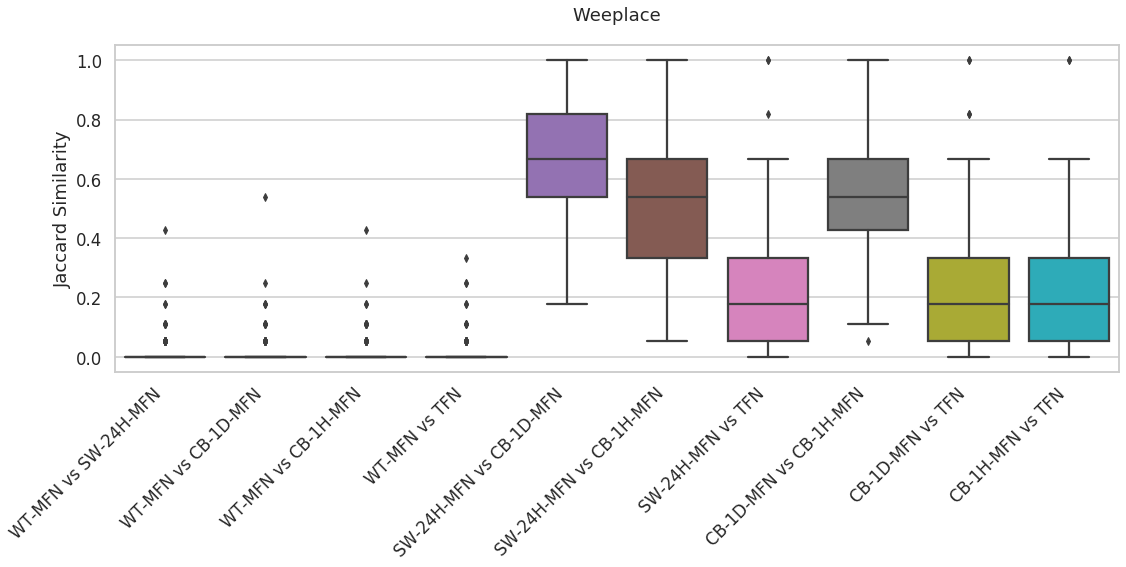

In [536]:
fig, ax = plt.subplots(figsize=(18, 6))
ax = sns.boxplot(data=df_individual_similarity , x='Compare', 
            y = 'Jaccard')
ax.set_title('Weeplace', pad = 25)
ax.set_xlabel('')
ax.set_ylabel('Jaccard Similarity')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

### Check Shared-Location rate (What does mean high ranking alter?)

In [461]:
VIP_Rank = VIP_network[['Included', 'userid', 'userid_y', 'category']]

In [462]:
pickle_in = open(placeid_path, "rb")
placeidT = pickle.load(pickle_in)
pickle_in.close()

In [463]:
VIP_rate = VIP_Rank.copy()
VIP_rate['USLR'] = VIP_Rank.apply(lambda row:util.shared_location_rate(row.userid, row.userid_y, placeidT)[0], axis=1)
VIP_rate['SLR'] = VIP_Rank.apply(lambda row:util.shared_location_rate(row.userid, row.userid_y, placeidT)[1], axis=1)

In [539]:
VIP_rate.to_csv('final/wp-150/wp_VIP_LR.csv', index=False)

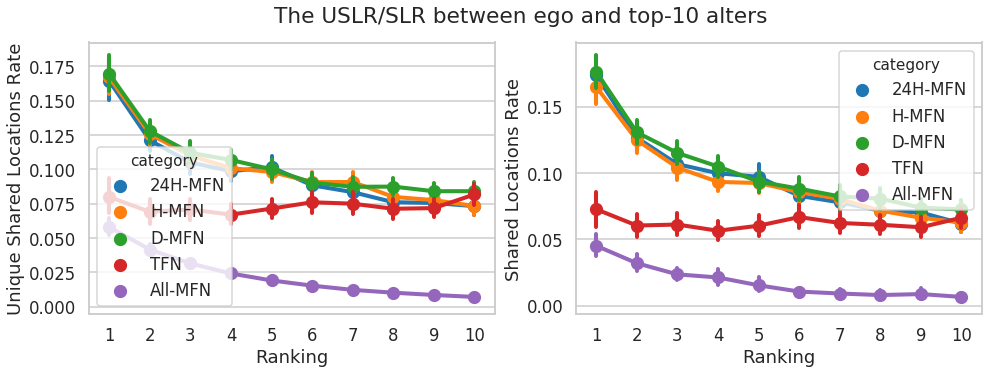

In [465]:
sns.set_style("whitegrid")
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 5))
fig.suptitle("The USLR/SLR between ego and top-10 alters")

sns.pointplot(x="Included", y="USLR", 
              data=VIP_rate, 
              hue='category', ci=95, join='True', ax=ax1)
ax1.set_ylabel('Unique Shared Locations Rate')
ax1.set_xlabel('Ranking')

sns.pointplot(x="Included", y="SLR", 
              data=VIP_rate, 
              hue='category', ci=95, join='True', ax=ax2)
ax2.set_ylabel('Shared Locations Rate')
ax2.set_xlabel('Ranking')
plt.show()